# Import Required Libraries

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow import keras
import cv2
from tensorflow.keras.models import load_model
from mtcnn import MTCNN

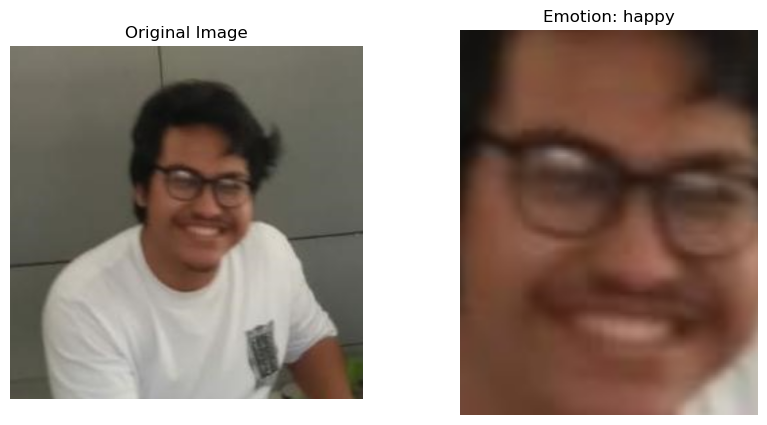

In [5]:
# Load model yang sudah dilatih
modelCustom = load_model("../model/5kelas.keras")

image_path = '../sample-test-img/image3.png'

# Inisialisasi detektor wajah MTCNN
detector = MTCNN()

# Mapping indeks ke nama kelas
class_names = ['angry', 'happy', 'neutral', 'sad', 'surprised']

def detect_and_crop_face(image):
    """
    Fungsi untuk mendeteksi wajah pertama dan meng-crop wajah tersebut.
    :param image: Input gambar (numpy array)
    :return: Gambar wajah yang ter-crop, atau None jika tidak ada wajah yang terdeteksi
    """
    faces = detector.detect_faces(image)  # Deteksi wajah dalam gambar
    if faces:
        x, y, w, h = faces[0]['box']  # Ambil koordinat wajah pertama
        cropped_face = image[y:y+h, x:x+w]  # Crop wajah dari gambar
        return cropped_face
    return None

def predict_image(image_array):
    """
    Fungsi untuk memprediksi emosi dari gambar input.
    :param image_array: Array gambar wajah yang sudah di-crop
    :return: Nama kelas prediksi
    """
    image_resized = cv2.resize(image_array, (100, 100))  # Resize ke ukuran input model
    image_resized = np.expand_dims(image_resized, axis=0)  # Tambahkan dimensi batch
    image_resized = image_resized / 255.0  # Normalisasi gambar
    predictions = modelCustom.predict(image_resized, verbose=0)  # Prediksi
    predicted_class = np.argmax(predictions)  # Ambil kelas dengan probabilitas tertinggi
    return class_names[predicted_class]

# Baca gambar dari file
image = cv2.imread(image_path)

# Cek apakah gambar berhasil dibaca
if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Convert BGR (OpenCV) ke RGB (matplotlib)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Deteksi dan crop wajah pertama
    cropped_face = detect_and_crop_face(image_rgb)

    if cropped_face is not None:
        # Prediksi emosi dari wajah yang ter-crop
        predicted_emotion = predict_image(cropped_face)

        # Tampilkan gambar asli dan wajah yang terdeteksi
        plt.figure(figsize=(10, 5))

        # Menampilkan gambar asli
        plt.subplot(1, 2, 1)
        plt.imshow(image_rgb)
        plt.title("Original Image")
        plt.axis('off')

        # Menampilkan wajah yang terdeteksi beserta prediksi emosi
        plt.subplot(1, 2, 2)
        plt.imshow(cropped_face)
        plt.title(f"Emotion: {predicted_emotion}")
        plt.axis('off')

        plt.show()
    else:
        print("Tidak ada wajah yang terdeteksi!")